In [127]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import ast


In [128]:
# Load csv file
comments_data = pd.read_csv('data/preprocessed.csv')

# Dataframe
df_comments = pd.DataFrame(comments_data) 

In [129]:
# Dataframes for different platforms
df_fb = df_comments[df_comments['platform'] == 'Facebook']
df_yt = df_comments[df_comments['platform'] == 'Youtube']
df_red = df_comments[df_comments['platform'] == 'Reddit']
df_tik = df_comments[df_comments['platform'] == 'Tiktok']

## Understanding the dataset

In [130]:
# check data samples 
df_comments.head(3)

,platform,raw,preprocessed
0,Facebook,Why nowadays every thing seem to be increasin...,"['nowadays', 'every', 'thing', 'seem', 'increa..."
1,Facebook,I will have to disagree.. we’re not that high!!,"['disagree', 'high']"
2,Facebook,"Wag po tayong mag-alala. Naniniwala po ako, is...","['wag', 'tayong', 'magalala', 'naniniwala', 'i..."


In [131]:
# check duplicates
print("Duplicates: ", df_comments.duplicated().sum())

Duplicates:  72


In [132]:
# check missing values
df_comments.isnull().sum()

platform        0
raw             0
preprocessed    0
dtype: int64

In [133]:
# check the data type of each column
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   platform      5209 non-null   object
 1   raw           5209 non-null   object
 2   preprocessed  5209 non-null   object
dtypes: object(3)
memory usage: 122.2+ KB


In [134]:
# check unique platforms
df_comments['platform'].unique()

array(['Facebook', 'Reddit', 'Tiktok', 'Youtube'], dtype=object)

## Visualization

In [135]:
# Generate bar graph
from collections import Counter
import seaborn as sns

def draw_bar_graph_for_text_visualization(df, platform, count):
    comments_word_list = get_words_from_col(df)
    
    comment_count = Counter(comments_word_list)
    top_words = pd.DataFrame(comment_count.most_common(count), columns=['word', 'Counter'])

    # add percentage column
    sum_count = top_words['Counter'].sum()
    count_percentages = []
    for num in top_words['Counter']:
        percent = round((num/sum_count)*100)
        count_percentages.append(percent)
    top_words.insert(2, "Percent (%)", count_percentages, True)

    # show bar plot
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.barplot( x='Counter', y='word', data=top_words, ax=ax)
    plt.title("Top "+ str(count) +" Most Prevalant Words on {}".format(platform))
    plt.xticks(rotation='horizontal');
    for i in ax.containers:
        ax.bar_label(i,)
    
    # show bar plot percentage
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.barplot( x='Percent (%)', y='word', data=top_words, ax=ax)
    plt.title("Percentages of Top " + str(count) + " Most Prevalent Words on " + platform + "".format(platform))
    plt.xticks(rotation='horizontal');
    for i in ax.containers:
        ax.bar_label(i,)
    

def get_words_from_col(df):
    comments = df['preprocessed']

    comments_word_list = []
    comments= comments.apply(eval)
    for sublist in comments:
        for word in sublist:
            comments_word_list.append(word)
    
    return comments_word_list

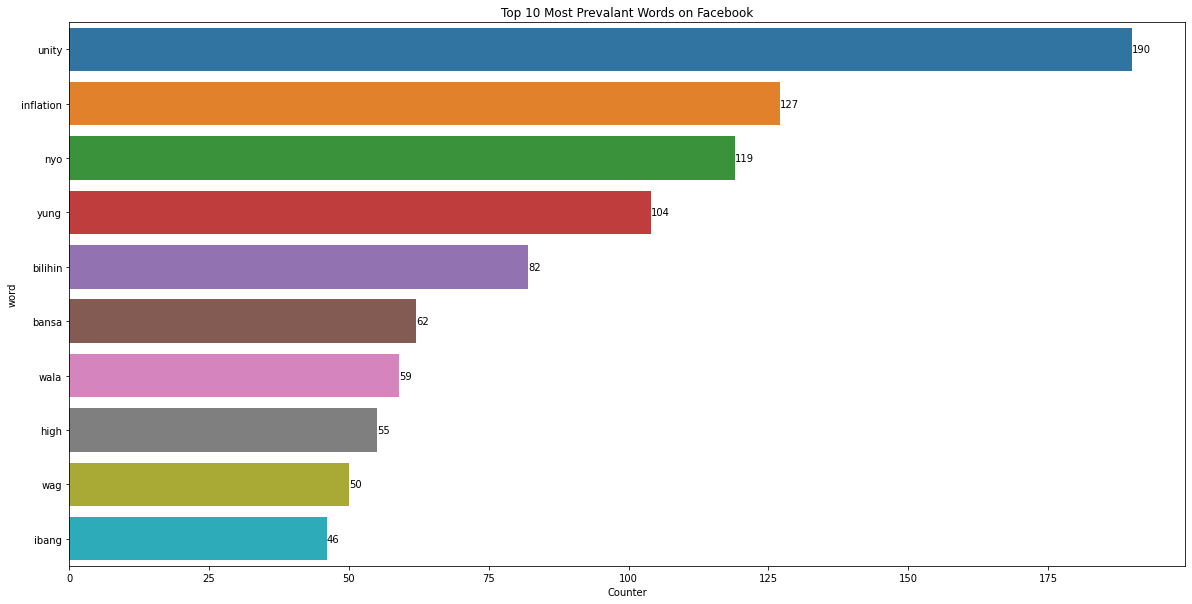

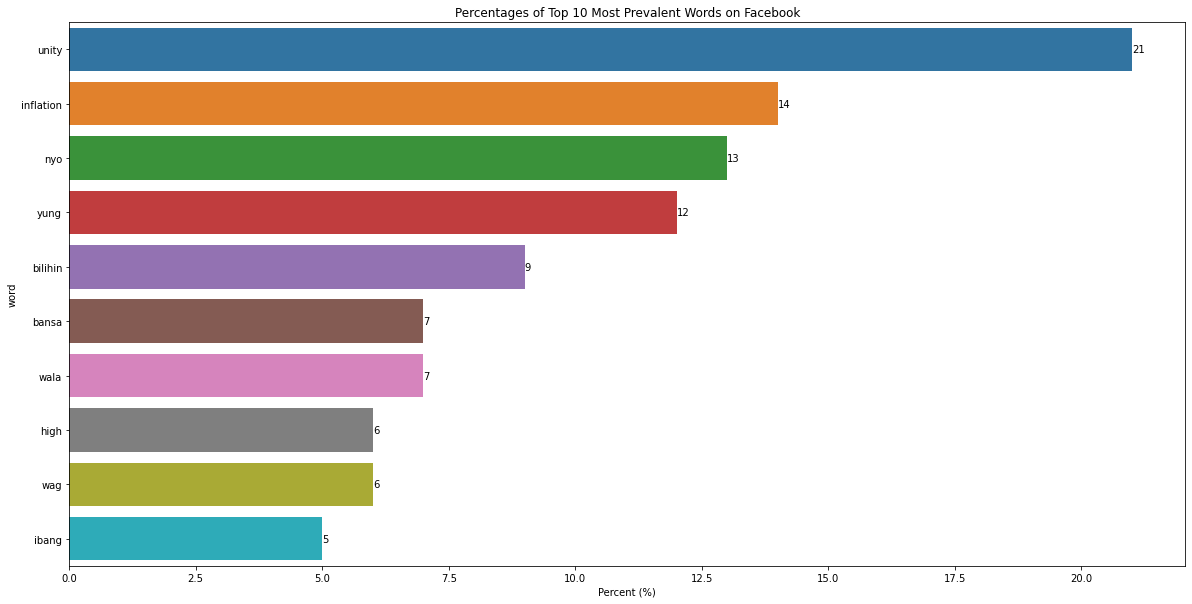

In [136]:
# Input top most prevalent words in Facebook
draw_bar_graph_for_text_visualization(df_fb, 'Facebook', 10)

In [137]:
# Generate word cloud
from wordcloud import WordCloud, STOPWORDS
def draw_word_cloud(df, title, count):
    comments_list = df['preprocessed'].apply(eval)
    word_cloud = WordCloud(
                    background_color='white',
                    max_words=count,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(comments_list))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle("Word Cloud of top " + str(count) +" words in " + title +" Comments", fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

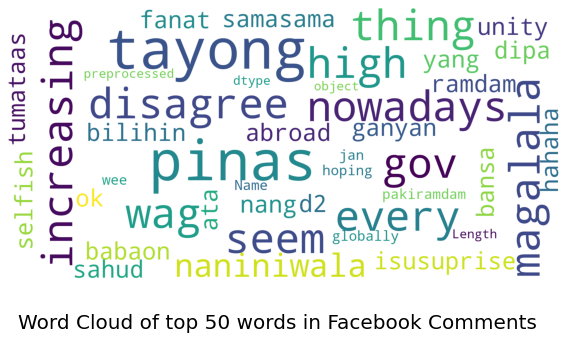

In [138]:
# WordCloud for Facebook comments
draw_word_cloud(df_fb, 'Facebook', 50)

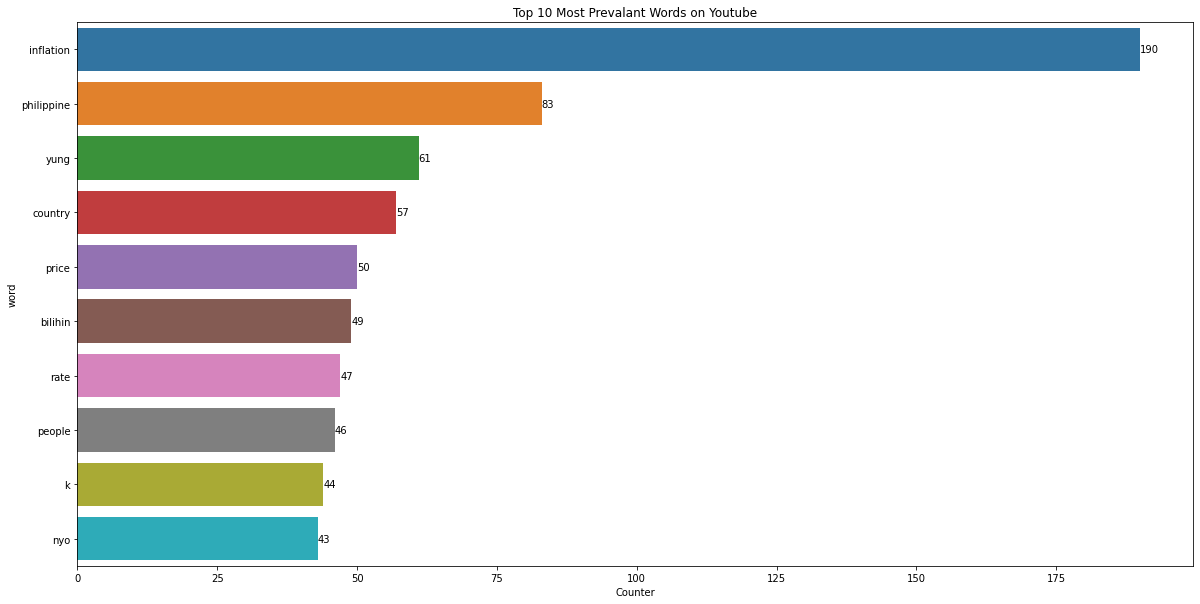

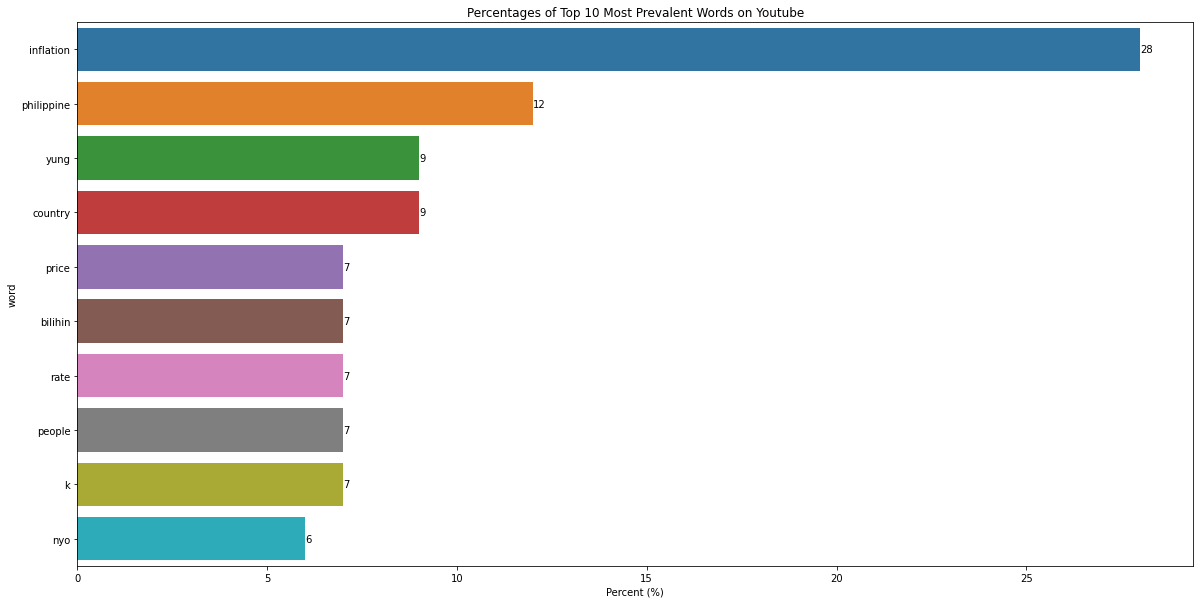

In [139]:
# Top 50 most prevalent words in Youtube
draw_bar_graph_for_text_visualization(df_yt, 'Youtube', 10)

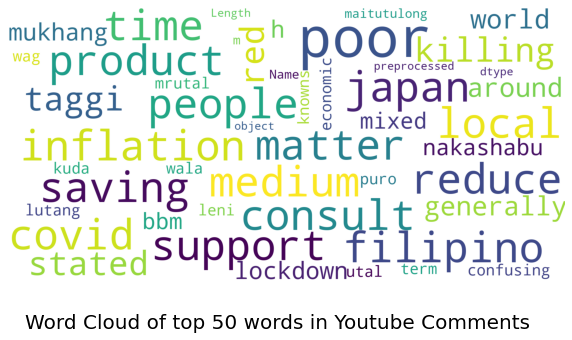

In [140]:
# WordCloud for Youtube comments
draw_word_cloud(df_yt, 'Youtube', 50)

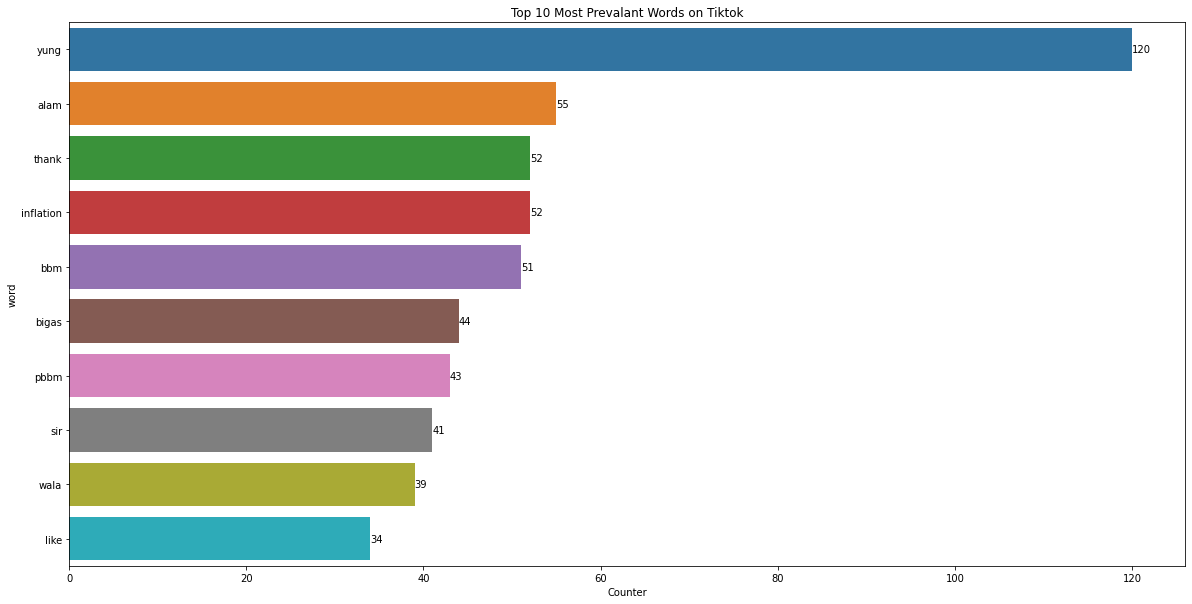

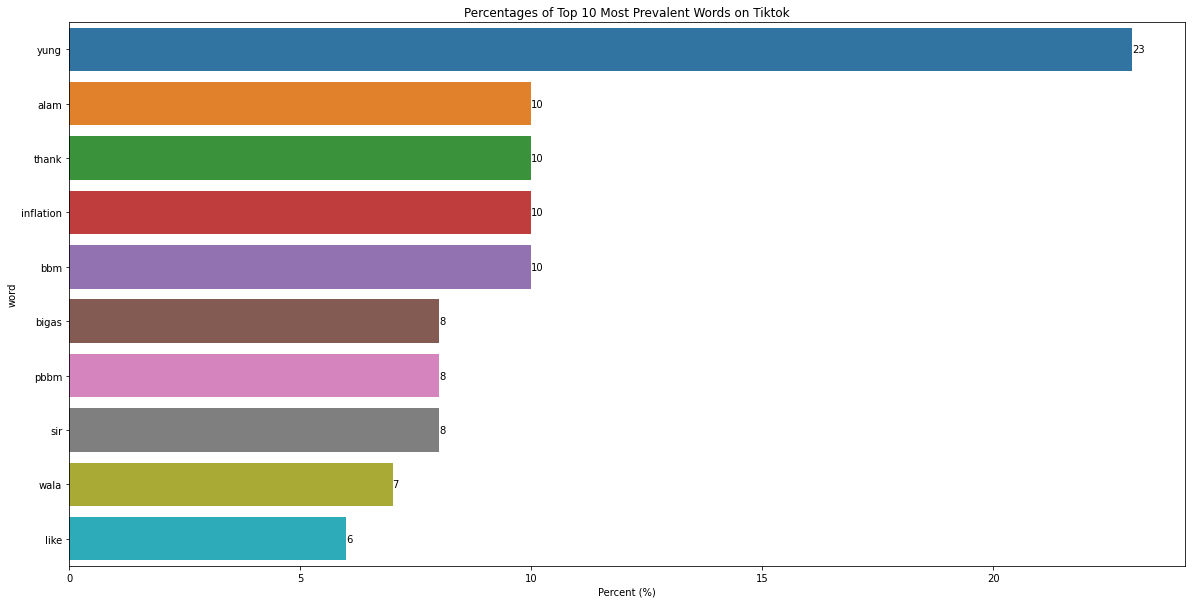

In [141]:
# Top 50 most prevalent words in Tiktok
draw_bar_graph_for_text_visualization(df_tik, 'Tiktok', 10)

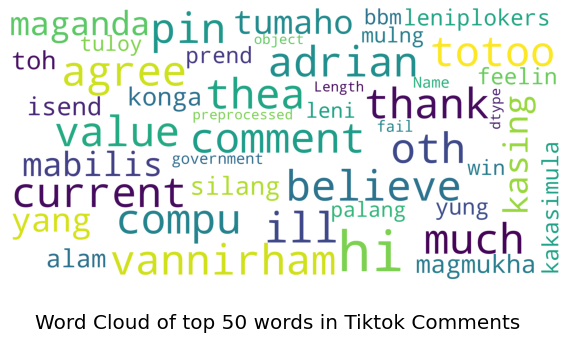

In [142]:
# WordCloud for Tiktok comments
draw_word_cloud(df_tik, 'Tiktok', 50)

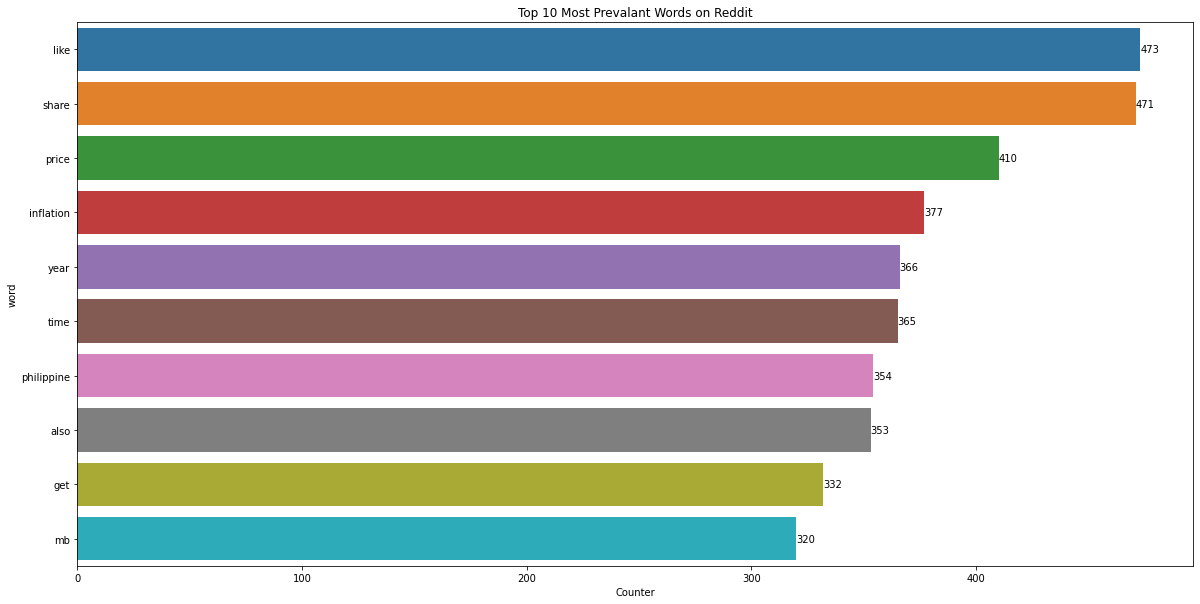

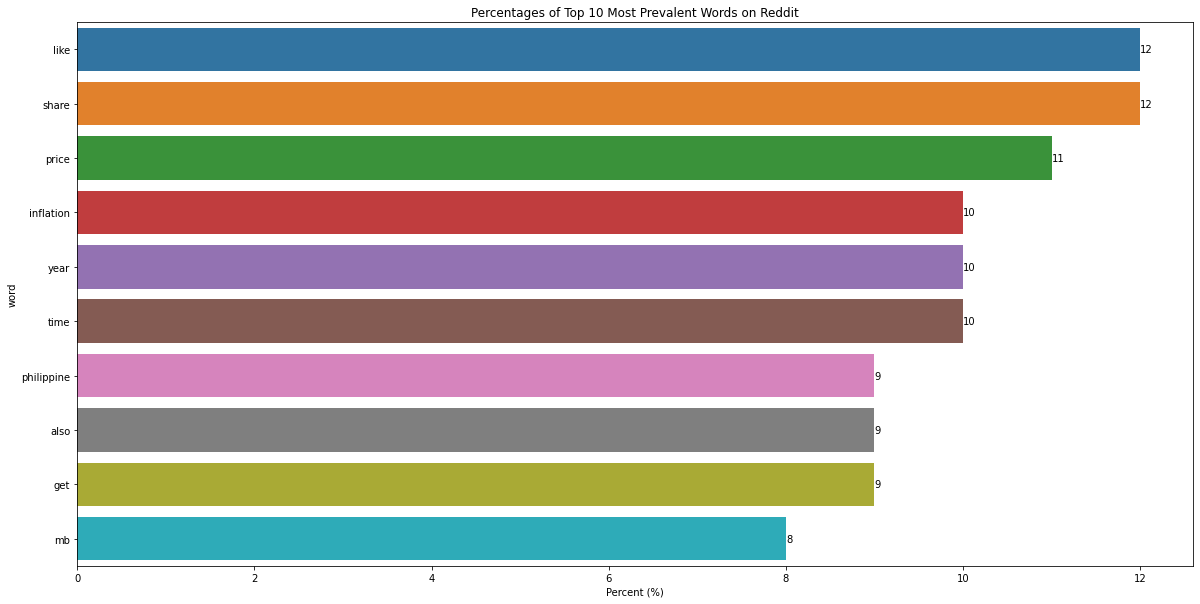

In [143]:
# Top 50 most prevalent words in Reddit
draw_bar_graph_for_text_visualization(df_red, 'Reddit', 10)

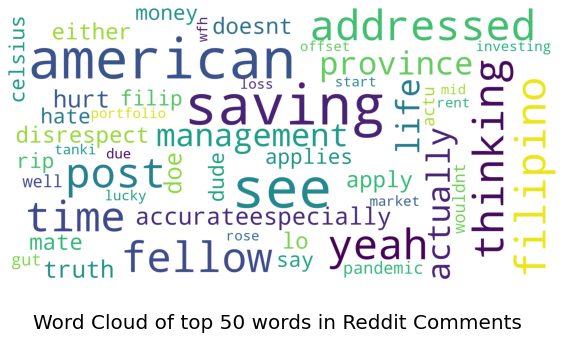

In [144]:
# WordCloud for Reddit comments
draw_word_cloud(df_red, 'Reddit', 50)